### Work and Health
1. Importing the data and building the data-frames
2. data exploration
    1. basic exploration
    2. statistical exploration
    3. visual exploration
3. Pre-processing
    1. Data Cleaning
    2. Outliers
    3. Missing Values
    4. Feature Engineering
    5. In-depth exploration
    6. Data transformation

<br><br>
note 1: focus on 2009 vs 2015<br>
note 2: drop hypertensive heart diseases due to low count of obs
1. geospatial analysis first <br>


LABOR INDICATORS: https://databank.worldbank.org/source/world-development-indicators

__TODO:__ create functions to create data frame in function of year and gender

<br>
Regarding the report --> get articles showing work related diseases
<br> 
1. https://osha.europa.eu/en/themes/work-related-diseases <br>

* EU-OSHA’s work on work-related diseases aims to provide an evidence base for prevention, policy and practice. Another important objective is to provide a better overview of the extent of the occupational burden of disease.

* Work-related diseases include:

1. Musculoskeletal disorders - OK
2. Stress and mental health disorders (Bipolar disorder, anxiety, depressive disorders) 
3. Work-related cancer
4. Skin diseases (dermatitis)
5. Work-related diseases from biological agents


### Importing the data, libraries and working on the data-frames

In [1]:
#Import the basic libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#Import the data
df_diseases = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Diseases_GHDx/IHME-GBD_2019_DATA-571888e5-1.csv')

In [3]:
df_diseases.sex_name.value_counts()

Female    56040
Male      56040
Both      56040
Name: sex_name, dtype: int64

### Let's first focus on a specific timestamp and explore spatial variations:
* year of 2009

In [4]:
#data cleaning - function that receives year of analysis, gender and indicator. Returns the cleaned df

def get_df(df,year,gender,metric):
    #drop redundant columns (code for each feature, mainly)
    df.copy().drop(columns=['measure_id','location_id','measure_name','sex_id','age_id','age_name','cause_id','metric_id'\
                         ,'upper','lower'], inplace=True)
    
    #filter by gender and year (Male or Female)
    df = df.loc[df_diseases['sex_name'].isin([gender])]\
.loc[df_diseases['year'] == year].drop(columns=['sex_name','year']).copy()
    
    #filter by metric (Number or Percent)
    df = df.loc[df.metric_name == metric].copy()
    df.drop(columns = ['metric_name'],inplace = True)
    
    #pivoting table with disease names = columns
    df = df.copy().pivot(index='location_name', columns = 'cause_name', values = 'val')
    
    #delete hypertensive heart disease because it's easier having it as column (after pivoting)
    df.drop(columns = ['Hypertensive heart disease'], inplace=True)
    
    return df

In [5]:
df_male = get_df(df_diseases,2009,'Male','Percent')

In [6]:
df_male

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
location_name,,,,,,,
Afghanistan,0.001096,0.000103,0.006387,0.007198,0.014836,0.004208,0.000145
Albania,0.000938,0.000095,0.002413,0.008636,0.023148,0.010923,0.000342
Algeria,0.001224,0.000125,0.007024,0.009523,0.018772,0.007405,0.000227
American Samoa,0.000997,0.000049,0.002983,0.008805,0.016415,0.007557,0.000252
Andorra,0.001375,0.000116,0.007009,0.006379,0.025370,0.010367,0.000209
...,...,...,...,...,...,...,...
Vanuatu,0.000934,0.000047,0.003770,0.008055,0.015376,0.006744,0.000319
Viet Nam,0.000594,0.000070,0.002762,0.011485,0.021370,0.008742,0.000413
Yemen,0.001007,0.000093,0.005559,0.006757,0.013703,0.004166,0.000140


### Basic exploration of df_male
1. for year = 2009
2. for gender = Male
3. for metric = Percentage

In [7]:
df_male.describe()

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.001009,0.000101,0.005545,0.008370,0.018872,0.007071,0.000249
std,0.000226,0.000031,0.001952,0.001613,0.004209,0.002573,0.000135
min,0.000573,0.000042,0.002362,0.005015,0.010675,0.003035,0.000079
25%,0.000849,0.000083,0.004137,0.007266,0.015790,0.004719,0.000152
50%,0.000980,0.000101,0.005086,0.008442,0.017872,0.006915,0.000213
75%,0.001125,0.000122,0.006598,0.009345,0.023148,0.008932,0.000316
max,0.001787,0.000212,0.012754,0.015248,0.029951,0.014695,0.000848


#### Check for bias & outliers

In [8]:
df_male.skew()

cause_name
Anxiety disorders            0.873081
Bipolar disorder             0.150243
Depressive disorders         1.128235
Dermatitis                   0.519809
Headache disorders           0.387237
Musculoskeletal disorders    0.515993
Stroke                       1.481790
dtype: float64

In [9]:
df_male.kurt()
#none of the diseases seem to have extreme outliers, though one should check the strokes to see why the high kurtosis

cause_name
Anxiety disorders            0.601989
Bipolar disorder             0.067780
Depressive disorders         1.583033
Dermatitis                   1.524223
Headache disorders          -0.745131
Musculoskeletal disorders   -0.383794
Stroke                       2.439422
dtype: float64

#### Basic visual exploration

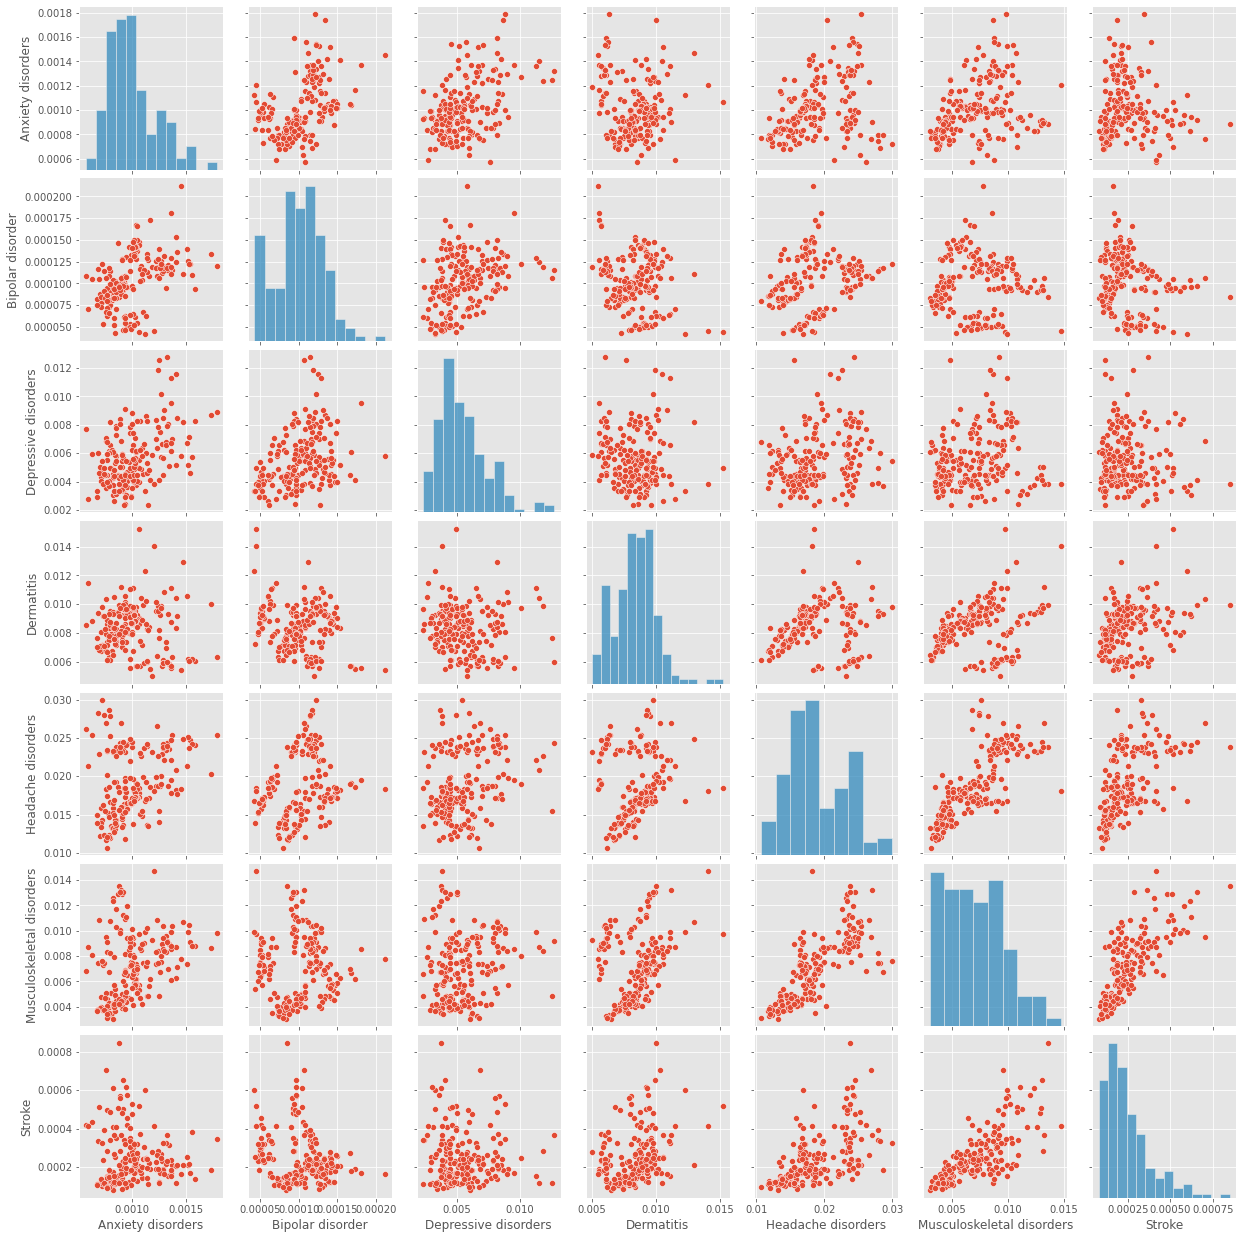

In [10]:
sns.pairplot(df_male)
plt.show()

#### Correlation check (spearman to catch non-linearities)

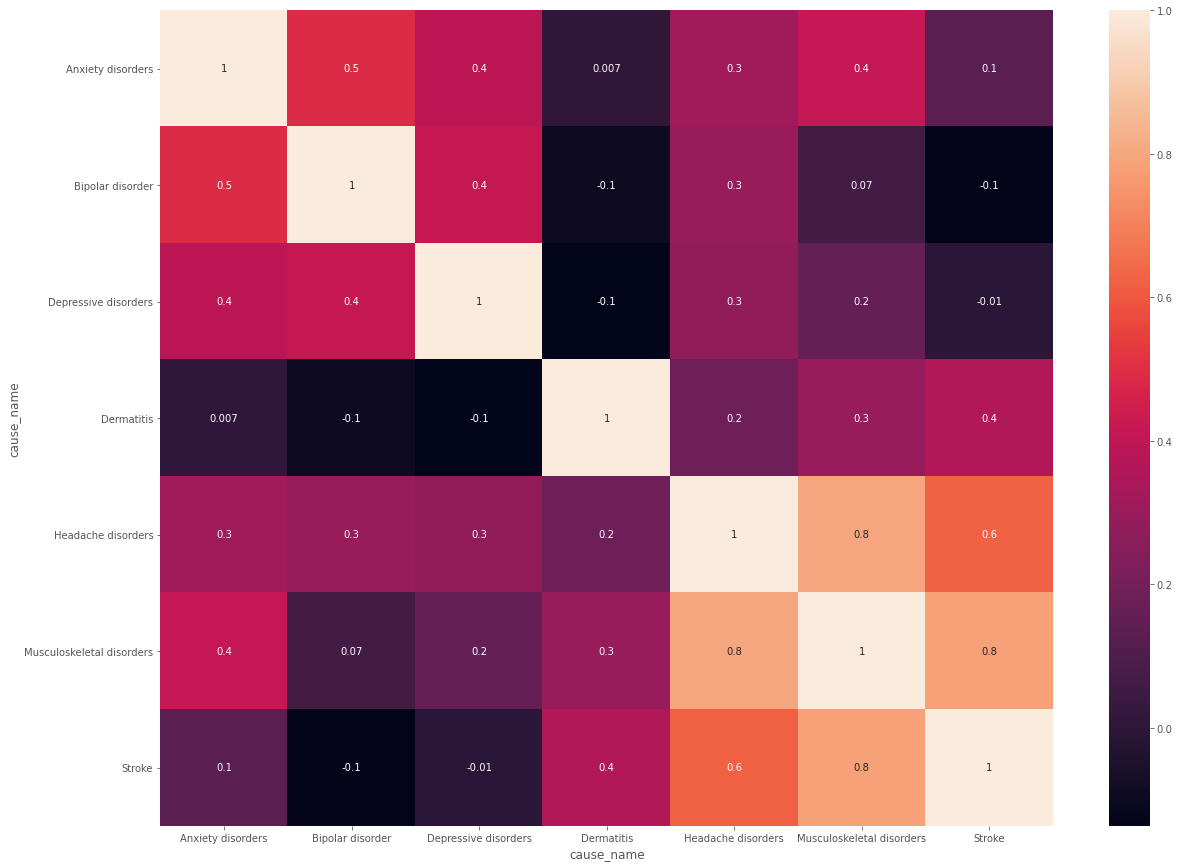

In [11]:
#check correlation between diseases:
df_corr = df_male.corr(method = 'spearman')
figure = plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, fmt = '.1g') 
plt.show()

* From the heatmap, we can note that Musculoskeleton disorders are highly correlated with stroke and headache disorders, thus for a possible cluster analysis, one should only keep 1 out of the 3.

### df_female for 2009

In [12]:
df_female = get_df(df_diseases,2009,'Female','Percent')

In [13]:
df_female.describe()

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.001357,0.000103,0.009006,0.009573,0.020205,0.008006,0.000276
std,0.000292,0.000033,0.003077,0.002467,0.004346,0.003153,0.000158
min,0.000854,0.000041,0.002529,0.005599,0.011129,0.002653,0.000081
25%,0.001092,0.000082,0.007058,0.007785,0.017301,0.005240,0.000165
50%,0.001370,0.000102,0.008567,0.008851,0.019246,0.007966,0.000239
75%,0.001550,0.000130,0.011013,0.010880,0.024102,0.010480,0.000320
max,0.002182,0.000180,0.020322,0.017185,0.031112,0.018297,0.000916


In [14]:
df_female.skew()

cause_name
Anxiety disorders            0.269082
Bipolar disorder            -0.071565
Depressive disorders         0.685429
Dermatitis                   0.904116
Headache disorders           0.249460
Musculoskeletal disorders    0.164697
Stroke                       1.700268
dtype: float64

In [15]:
df_female.kurt()

cause_name
Anxiety disorders           -0.589795
Bipolar disorder            -1.024143
Depressive disorders         0.890470
Dermatitis                   0.078212
Headache disorders          -0.588495
Musculoskeletal disorders   -0.668262
Stroke                       2.925428
dtype: float64

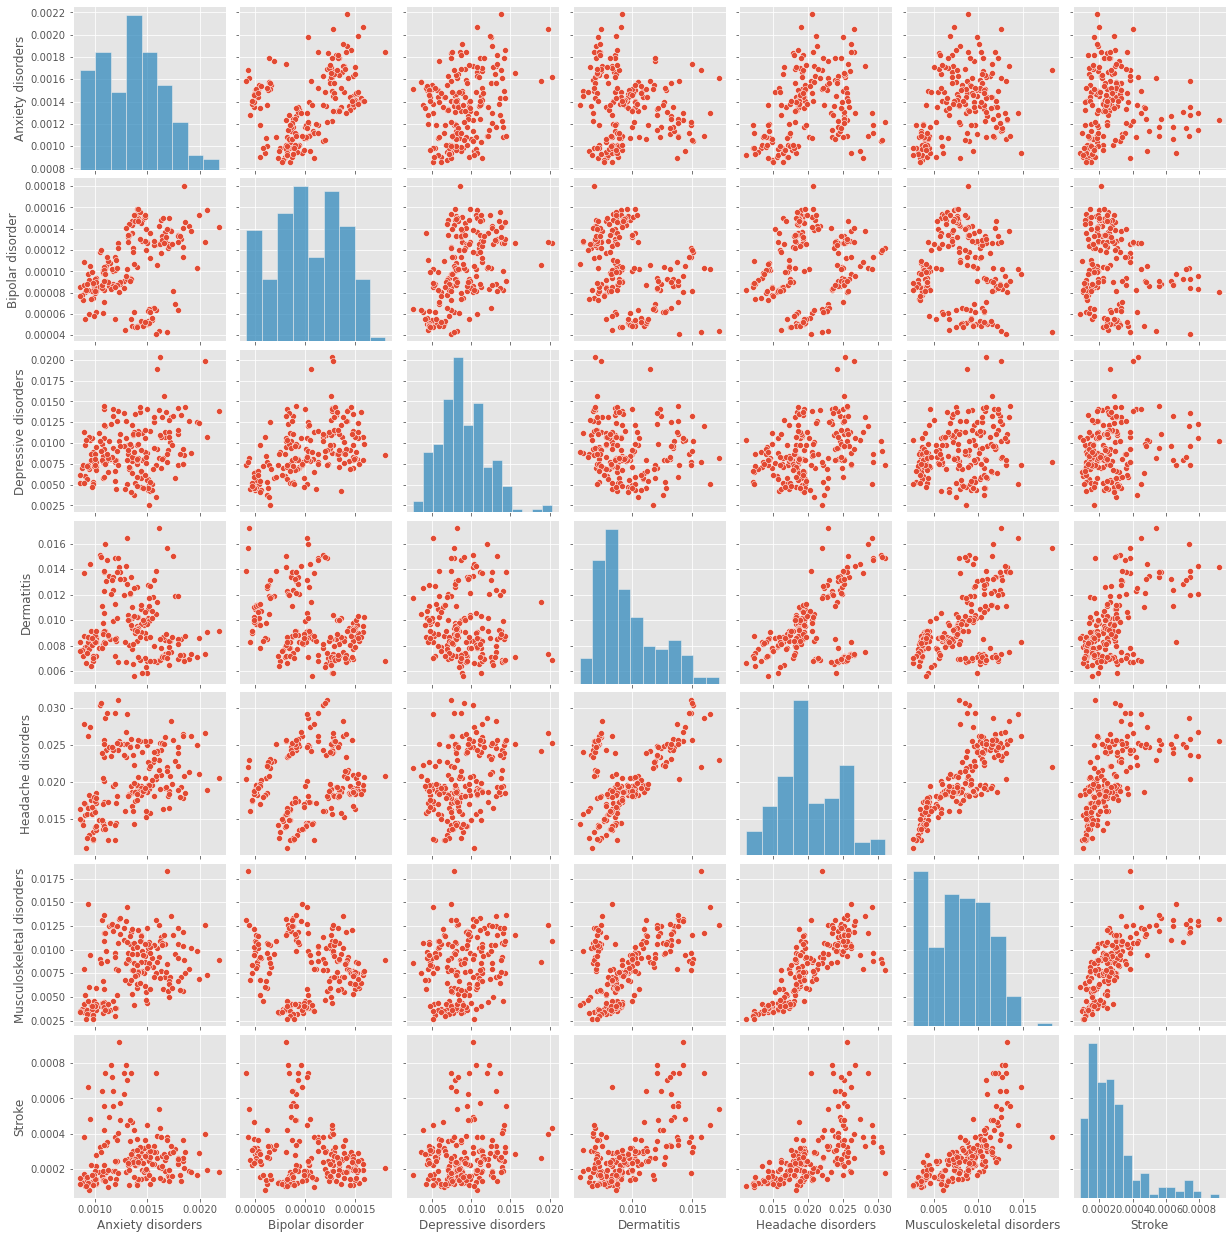

In [16]:
sns.pairplot(df_female)
plt.show()

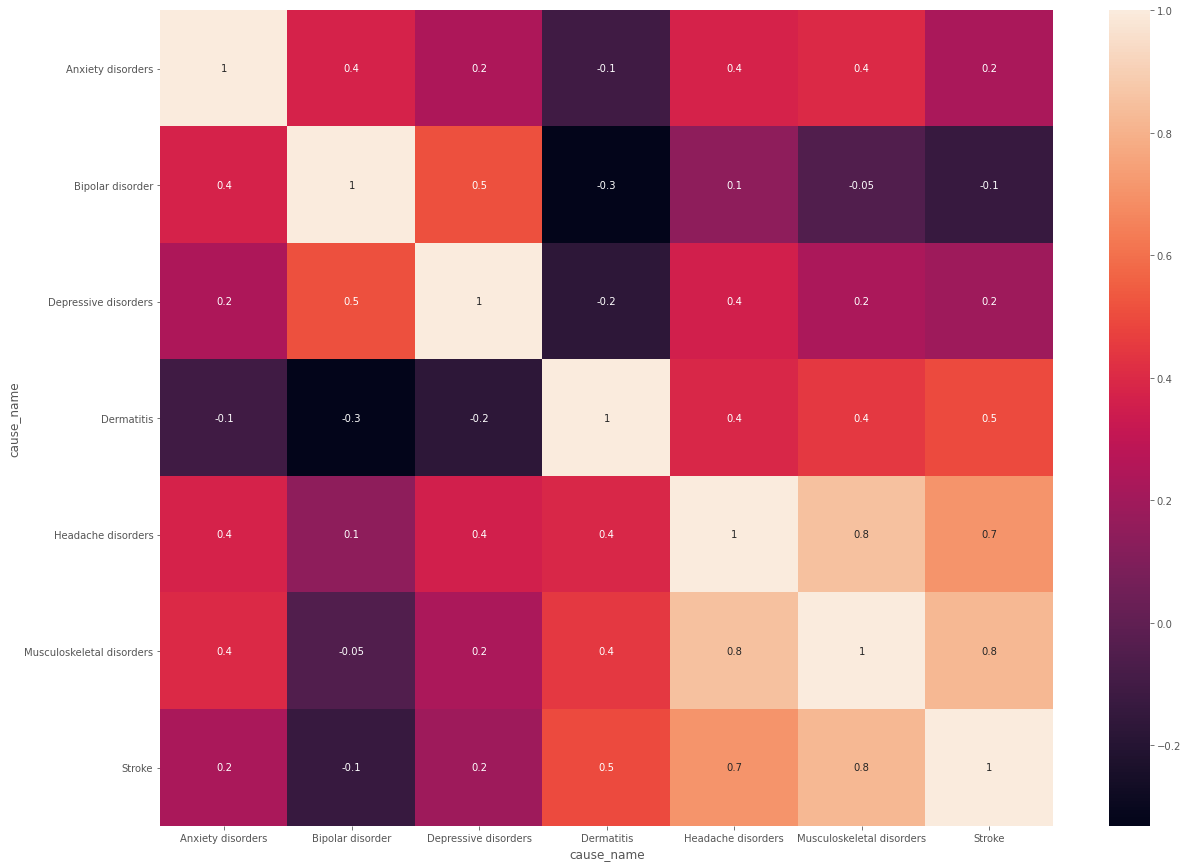

In [17]:
#check correlation between diseases:
df_corr = df_female.corr(method = 'spearman')
figure = plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, fmt = '.1g') 
plt.show()

* For the gender = Female, the correlation seems to be higher compared to the male gender. Also here we can note that Musculoskeleton disorders are highly correlated with stroke and headache disorders, thus for a possible cluster analysis, one should only keep 1 out of the 3.

### df_all for 2009
* includes both male and female genders

In [18]:
df_both = get_df(df_diseases,2009,'Both','Percent')

In [19]:
df_both.describe()

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.001185,0.000102,0.007322,0.008999,0.019554,0.007557,0.000263
std,0.000251,0.000032,0.002421,0.001933,0.004251,0.002819,0.000146
min,0.000738,0.000042,0.002446,0.005458,0.010909,0.002894,0.000093
25%,0.000973,0.000082,0.005659,0.007595,0.016577,0.004949,0.000158
50%,0.001187,0.000101,0.006911,0.008823,0.018410,0.007516,0.000227
75%,0.001336,0.000127,0.008926,0.010199,0.023678,0.009598,0.000316
max,0.001963,0.000195,0.016702,0.016198,0.030297,0.016495,0.000883


In [20]:
df_both.kurt()

cause_name
Anxiety disorders           -0.091586
Bipolar disorder            -0.690327
Depressive disorders         0.911123
Dermatitis                   0.448764
Headache disorders          -0.642373
Musculoskeletal disorders   -0.632305
Stroke                       2.707600
dtype: float64

In [21]:
df_both.skew()

cause_name
Anxiety disorders            0.527744
Bipolar disorder            -0.033040
Depressive disorders         0.816540
Dermatitis                   0.660732
Headache disorders           0.318247
Musculoskeletal disorders    0.286258
Stroke                       1.606423
dtype: float64

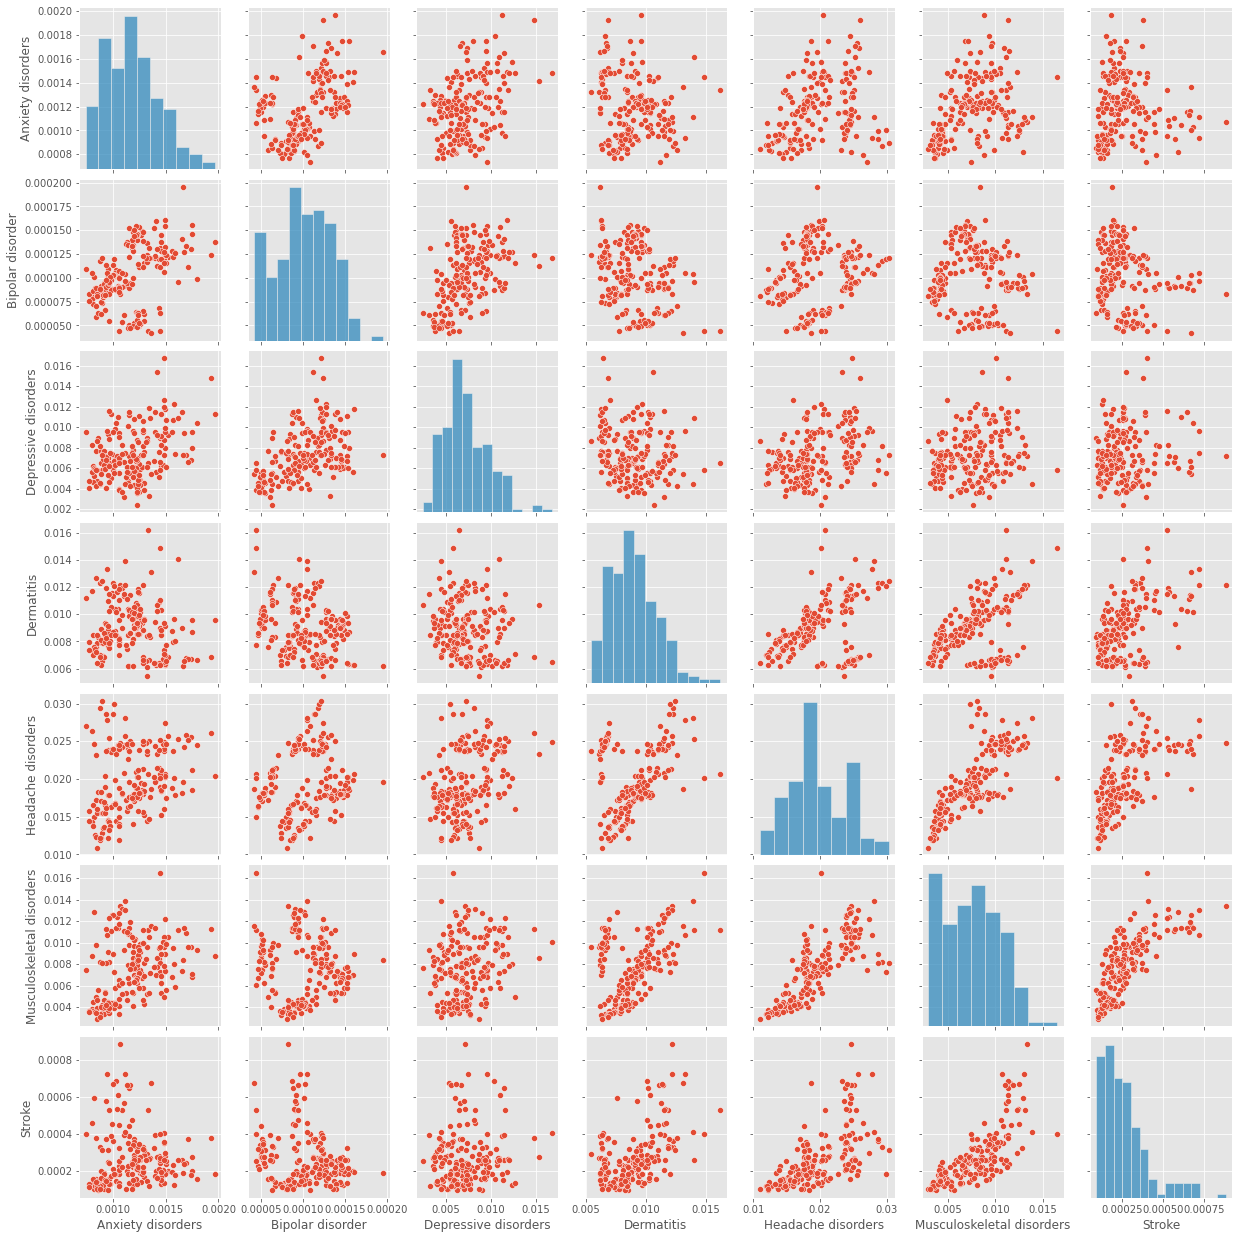

In [22]:
sns.pairplot(df_both)
plt.show()

### Outliers

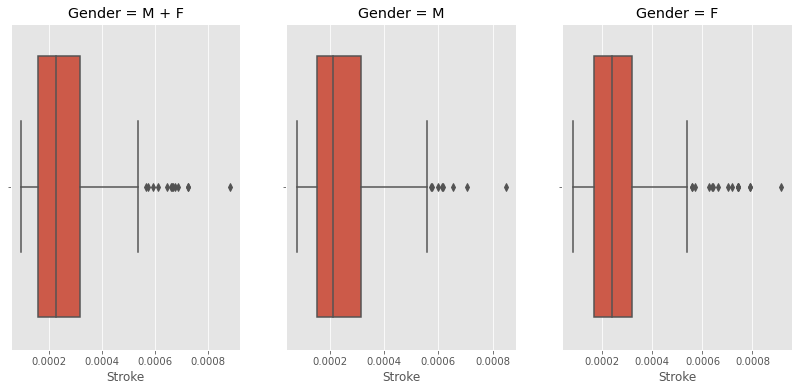

In [23]:
# Stroke has highest kurtosis in all data frames
fig, axes = plt.subplots(1,3, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df_both, x = 'Stroke').set(title='Gender = M + F') 
sns.boxplot(ax = axes[1], data = df_male, x = 'Stroke').set(title='Gender = M')
sns.boxplot(ax = axes[2], data = df_female, x = 'Stroke').set(title='Gender = F') 
plt.show()

### df_health_cost

* In this csv, there are two series, each one having 264 countries and 20 years.
* One of the series relates to health costs in the private sector whereas the other is related to government health costs.
* For a first basic analysis, we're gonna split the df into two: one for the first and the other for the second series. We're also only interested in the year of 2009 and spatial variation of the values

In [24]:
df_health_cost = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Health_expenditure_WB/Health_expenditure_WB.xls',na_values='..')

In [25]:
df_health_cost = df_health_cost[['Series Code','Country Name','2009 [YR2009]']].copy()

In [26]:
df_health_cost.isna().sum()

Series Code       0
Country Name      0
2009 [YR2009]    62
dtype: int64

In [27]:
df_health_cost = df_health_cost.copy().pivot(index='Country Name', columns = 'Series Code', values = '2009 [YR2009]')

In [28]:
df_health_cost.rename(columns={'SH.XPD.GHED.PP.CD':'Public_cost','SH.XPD.PVTD.PP.CD':'Private_cost'}, inplace=True)

In [29]:
df_health_cost = df_health_cost.rename_axis('location_name')
df_health_cost 

Series Code,Public_cost,Private_cost
location_name,,
Afghanistan,7.680923,103.188835
Albania,202.939850,188.257721
Algeria,467.185333,191.505280
American Samoa,NaN,NaN
Andorra,1884.315308,840.804810
...,...,...
West Bank and Gaza,NaN,NaN
World,584.834579,428.587082
"Yemen, Rep.",55.245289,190.253067


In [30]:
complete_0 = pd.merge(df_both,df_health_cost, on='location_name', how='inner')
complete_0

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost
location_name,,,,,,,,,
Afghanistan,0.001293,0.000115,0.007573,0.006548,0.015242,0.004300,0.000168,7.680923,103.188835
Albania,0.001143,0.000095,0.004759,0.010407,0.024004,0.010758,0.000352,202.939850,188.257721
Algeria,0.001448,0.000131,0.008899,0.008974,0.018985,0.007246,0.000240,467.185333,191.505280
American Samoa,0.001243,0.000050,0.003640,0.009481,0.017709,0.008634,0.000268,NaN,NaN
Andorra,0.001523,0.000122,0.009193,0.006882,0.025708,0.010475,0.000200,1884.315308,840.804810
...,...,...,...,...,...,...,...,...,...
Uruguay,0.001388,0.000152,0.006714,0.006413,0.020301,0.007774,0.000321,791.993225,542.296631
Uzbekistan,0.000896,0.000121,0.007301,0.012461,0.030297,0.008098,0.000311,119.411751,162.179382
Vanuatu,0.001164,0.000047,0.004260,0.008591,0.016476,0.007516,0.000315,56.090603,11.152098


### GDP per cap data frame

In [40]:
df_gdp = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/GPD_WB/GPD_CAPITA_WB.xlsx',na_values='..')

In [41]:
df_gdp = df_gdp[['Series Code', 'Country Name', '2009 [YR2009]']].copy()

In [42]:
df_gdp.isna().sum()

Series Code       0
Country Name      0
2009 [YR2009]    13
dtype: int64

In [43]:
df_gdp = df_gdp.copy().pivot(index='Country Name', columns = 'Series Code', values = '2009 [YR2009]')

In [44]:
df_gdp = df_gdp.rename_axis('location_name')
df_gdp

Series Code,NY.GDP.PCAP.CD
location_name,
Afghanistan,438.076034
Albania,4114.140114
Algeria,3883.132425
American Samoa,11961.258226
Andorra,43503.185516
...,...
West Bank and Gaza,2191.781787
World,8832.462964
"Yemen, Rep.",1116.084594


In [47]:
df_gdp.rename(columns={'NY.GDP.PCAP.CD':'GDP_per_cap(doll)'}, inplace=True)

In [48]:
complete_1 = pd.merge(complete_0,df_gdp, on='location_name', how='inner')
complete_1

,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap(doll)
location_name,,,,,,,,,,
Afghanistan,0.001293,0.000115,0.007573,0.006548,0.015242,0.004300,0.000168,7.680923,103.188835,438.076034
Albania,0.001143,0.000095,0.004759,0.010407,0.024004,0.010758,0.000352,202.939850,188.257721,4114.140114
Algeria,0.001448,0.000131,0.008899,0.008974,0.018985,0.007246,0.000240,467.185333,191.505280,3883.132425
American Samoa,0.001243,0.000050,0.003640,0.009481,0.017709,0.008634,0.000268,NaN,NaN,11961.258226
Andorra,0.001523,0.000122,0.009193,0.006882,0.025708,0.010475,0.000200,1884.315308,840.804810,43503.185516
...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.001388,0.000152,0.006714,0.006413,0.020301,0.007774,0.000321,791.993225,542.296631,9451.932449
Uzbekistan,0.000896,0.000121,0.007301,0.012461,0.030297,0.008098,0.000311,119.411751,162.179382,1213.265328
Vanuatu,0.001164,0.000047,0.004260,0.008591,0.016476,0.007516,0.000315,56.090603,11.152098,2649.618144


In [49]:
complete_1.kurt()

Anxiety disorders            -0.299315
Bipolar disorder             -0.575276
Depressive disorders          0.932820
Dermatitis                    0.471571
Headache disorders           -0.706676
Musculoskeletal disorders    -0.923577
Stroke                        2.983987
Public_cost                   2.789232
Private_cost                 25.348827
GDP_per_cap(doll)            11.791091
dtype: float64

In [50]:
complete_1.skew()

Anxiety disorders            0.494457
Bipolar disorder            -0.017503
Depressive disorders         0.816728
Dermatitis                   0.641651
Headache disorders           0.267487
Musculoskeletal disorders    0.197994
Stroke                       1.700142
Public_cost                  1.801054
Private_cost                 4.214756
GDP_per_cap(doll)            2.953002
dtype: float64

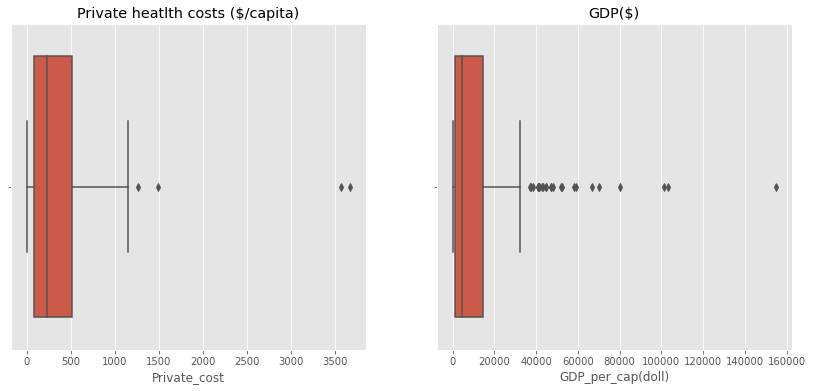

In [52]:
# check distribution of feature with highest kurtosis/skewness
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = complete_1, x = 'Private_cost').set(title='Private heatlth costs ($/capita)') 
sns.boxplot(ax = axes[1], data = complete_1, x = 'GDP_per_cap(doll)').set(title='GDP($)')
plt.show()

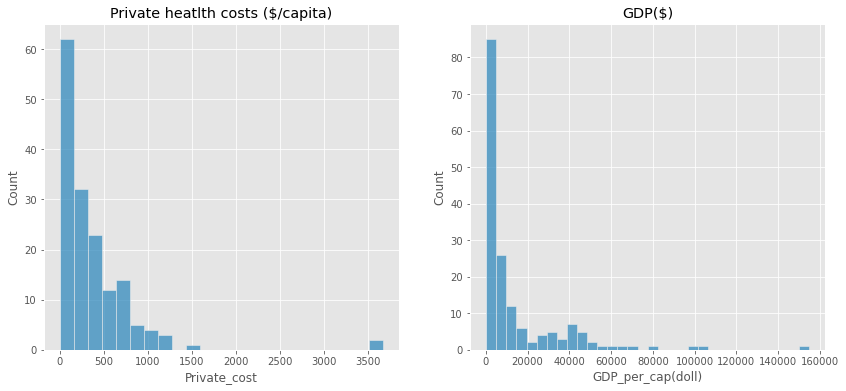

In [53]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.histplot(ax = axes[0], data = complete_1, x ='Private_cost').set(title='Private heatlth costs ($/capita)') 
sns.histplot(ax = axes[1], data = complete_1, x = 'GDP_per_cap(doll)').set(title='GDP($)')
plt.show()

### Employment data
. important to check metadata (Employment_WB_Metadata.csv) to interpret percentages, as per:

* __per_female_agriculture__: Employment in agriculture, female (% of female employment)
* __per_male_agriculture__: Employment in agriculture, male (% of male employment) 
* __per_total_agriculture__: Employment in agriculture (% of total employment)
* __per_female_employment__: Employment to population ratio, 15+, female (%)
* __per_male_employment__: Employment to population ratio, 15+, male (%)  
* __per_total_employment__: Employment to population ratio, 15+, total (%) 
* __per_female_industry__: Employment in industry, female (% of female employment) 
* __per_male_industry__: Employment in industry, male (% of male employment)
* __per_total_industry__: Employment in industry (% of total employment)
* __per_female_services__: Employment in services, female (% of female employment)
* __per_male_industry__: Employment in industry, male (% of male employment)
* __per_total_services__: Employment in services (% of total employment) 




In [54]:
df_employment = pd.read_excel('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Employment_WB_2/Employment_WB_2.xlsx',na_values='..')

In [55]:
df_employment = df_employment[['Series Code', 'Country Name', '2009 [YR2009]']].copy()

In [56]:
df_employment.isna().sum()

Series Code        0
Country Name       0
2009 [YR2009]    372
dtype: int64

In [57]:
df_employment

,Series Code,Country Name,2009 [YR2009]
0,SL.EMP.TOTL.SP.ZS,Afghanistan,42.349998
1,SL.EMP.TOTL.SP.MA.ZS,Afghanistan,70.360001
2,SL.EMP.TOTL.SP.FE.ZS,Afghanistan,12.860000
3,SL.SRV.EMPL.MA.ZS,Afghanistan,32.680000
4,SL.SRV.EMPL.FE.ZS,Afghanistan,10.970000
...,...,...,...
3163,SL.IND.EMPL.FE.ZS,Zimbabwe,3.210000
3164,SL.IND.EMPL.ZS,Zimbabwe,9.180000
3165,SL.AGR.EMPL.MA.ZS,Zimbabwe,59.720001
3166,SL.AGR.EMPL.FE.ZS,Zimbabwe,72.320000


In [58]:
df_employment = df_employment.copy().pivot(index='Country Name', columns = 'Series Code', values = '2009 [YR2009]')

In [59]:
df_employment = df_employment.rename_axis('location_name')

In [60]:
df_employment 

Series Code,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,SL.EMP.TOTL.SP.FE.ZS,SL.EMP.TOTL.SP.MA.ZS,SL.EMP.TOTL.SP.ZS,SL.IND.EMPL.FE.ZS,SL.IND.EMPL.MA.ZS,SL.IND.EMPL.ZS,SL.SRV.EMPL.FE.ZS,SL.SRV.EMPL.MA.ZS,SL.SRV.EMPL.ZS
location_name,,,,,,,,,,,,
Afghanistan,74.220001,53.889999,56.889999,12.860000,70.360001,42.349998,14.810000,13.430000,13.630000,10.970000,32.680000,29.480000
Albania,57.220001,35.049999,44.049999,37.919998,56.360001,47.070000,10.260000,26.559999,19.940001,32.520000,38.389999,36.009998
Algeria,4.200000,14.620000,13.030000,11.630000,63.720001,37.820000,24.730000,30.440001,29.570000,71.080002,54.930000,57.400002
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,24.010000,10.060000,12.600000,11.470000,50.380001,31.129999,8.460000,26.900000,23.530001,67.529999,63.049999,63.860001
World,32.867313,34.237845,33.697765,46.173780,71.870755,59.003547,16.365849,25.952533,22.196706,50.768125,39.812757,44.106783
"Yemen, Rep.",30.610001,24.520000,25.299999,8.850000,60.720001,34.779999,13.050000,19.219999,18.430000,56.349998,56.259998,56.270000


In [61]:
df_employment.rename(columns={'SL.AGR.EMPL.FE.ZS':'per_female_agriculture',\
                      'SL.AGR.EMPL.MA.ZS':'per_male_agriculture',\
                      'SL.AGR.EMPL.ZS':'per_total_agriculture',\
                      'SL.EMP.TOTL.SP.ZS':'per_total_employment',\
                      'SL.EMP.TOTL.SP.MA.ZS':'per_male_employment',\
                      'SL.EMP.TOTL.SP.FE.ZS':'per_female_employment',\
                      'SL.IND.EMPL.FE.ZS':'per_female_industry',\
                      'SL.IND.EMPL.MA.ZS':'per_male_industry',\
                      'SL.IND.EMPL.ZS':'per_total_industry',\
                      'SL.SRV.EMPL.FE.ZS':'per_female_services',\
                      'SL.SRV.EMPL.MA.ZS':'per_male_industry',\
                      'SL.SRV.EMPL.ZS':'per_total_services'}, inplace=True)

In [62]:
df_employment

Series Code,per_female_agriculture,per_male_agriculture,per_total_agriculture,per_female_employment,per_male_employment,per_total_employment,per_female_industry,per_male_industry,per_total_industry,per_female_services,per_male_industry,per_total_services
location_name,,,,,,,,,,,,
Afghanistan,74.220001,53.889999,56.889999,12.860000,70.360001,42.349998,14.810000,13.430000,13.630000,10.970000,32.680000,29.480000
Albania,57.220001,35.049999,44.049999,37.919998,56.360001,47.070000,10.260000,26.559999,19.940001,32.520000,38.389999,36.009998
Algeria,4.200000,14.620000,13.030000,11.630000,63.720001,37.820000,24.730000,30.440001,29.570000,71.080002,54.930000,57.400002
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,24.010000,10.060000,12.600000,11.470000,50.380001,31.129999,8.460000,26.900000,23.530001,67.529999,63.049999,63.860001
World,32.867313,34.237845,33.697765,46.173780,71.870755,59.003547,16.365849,25.952533,22.196706,50.768125,39.812757,44.106783
"Yemen, Rep.",30.610001,24.520000,25.299999,8.850000,60.720001,34.779999,13.050000,19.219999,18.430000,56.349998,56.259998,56.270000


#### Let's merge some of the Employment data frame columns to the complete df
* complete_1 has info on both genders, let's get aggregated data (gender-wise) on df_employment:
1. per_total_industry
2. per_total_agriculture
3. per_total_services
4. per_total_employment

In [63]:
df_employment_totals = df_employment[['per_total_industry','per_total_agriculture','per_total_services','per_total_employment']]

In [64]:
complete_2 = pd.merge(df_employment_totals,complete_1, on='location_name', how='inner')

In [65]:
complete_2

,per_total_industry,per_total_agriculture,per_total_services,per_total_employment,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap(doll)
location_name,,,,,,,,,,,,,,
Afghanistan,13.630000,56.889999,29.480000,42.349998,0.001293,0.000115,0.007573,0.006548,0.015242,0.004300,0.000168,7.680923,103.188835,438.076034
Albania,19.940001,44.049999,36.009998,47.070000,0.001143,0.000095,0.004759,0.010407,0.024004,0.010758,0.000352,202.939850,188.257721,4114.140114
Algeria,29.570000,13.030000,57.400002,37.820000,0.001448,0.000131,0.008899,0.008974,0.018985,0.007246,0.000240,467.185333,191.505280,3883.132425
American Samoa,NaN,NaN,NaN,NaN,0.001243,0.000050,0.003640,0.009481,0.017709,0.008634,0.000268,NaN,NaN,11961.258226
Andorra,NaN,NaN,NaN,NaN,0.001523,0.000122,0.009193,0.006882,0.025708,0.010475,0.000200,1884.315308,840.804810,43503.185516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,20.959999,10.950000,68.089996,60.680000,0.001388,0.000152,0.006714,0.006413,0.020301,0.007774,0.000321,791.993225,542.296631,9451.932449
Uzbekistan,22.480000,28.090000,49.439999,59.599998,0.000896,0.000121,0.007301,0.012461,0.030297,0.008098,0.000311,119.411751,162.179382,1213.265328
Vanuatu,7.030000,60.549999,32.419998,66.320000,0.001164,0.000047,0.004260,0.008591,0.016476,0.007516,0.000315,56.090603,11.152098,2649.618144


In [69]:
# Missing values (% of total data)
complete_2.isna().sum()/1.68

per_total_industry           9.523810
per_total_agriculture        9.523810
per_total_services           9.523810
per_total_employment         9.523810
Anxiety disorders            0.000000
Bipolar disorder             0.000000
Depressive disorders         0.000000
Dermatitis                   0.000000
Headache disorders           0.000000
Musculoskeletal disorders    0.000000
Stroke                       0.000000
Public_cost                  5.952381
Private_cost                 5.952381
GDP_per_cap(doll)            1.785714
dtype: float64

In [66]:
complete_2.describe()

,per_total_industry,per_total_agriculture,per_total_services,per_total_employment,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke,Public_cost,Private_cost,GDP_per_cap(doll)
count,152.000000,152.000000,152.000000,152.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,158.000000,158.000000,165.000000
mean,19.564013,29.170263,51.266974,57.280197,0.001179,0.000103,0.007348,0.008870,0.019618,0.007486,0.000260,764.853766,367.229760,14251.332250
std,8.673851,24.252792,18.828472,11.873692,0.000251,0.000031,0.002471,0.001871,0.004307,0.002767,0.000148,1039.690506,480.433613,22206.975923
min,2.130000,0.330000,8.410000,34.389999,0.000738,0.000044,0.002446,0.005458,0.010909,0.002894,0.000093,4.098026,2.774991,212.136880
25%,13.810000,6.925000,36.137500,49.430000,0.000962,0.000083,0.005710,0.007444,0.016568,0.004887,0.000155,70.405787,79.233982,1344.728409
50%,20.010000,23.355000,53.610001,56.945000,0.001177,0.000103,0.006930,0.008568,0.018457,0.007508,0.000220,293.901901,227.549881,4714.702495
75%,25.262500,46.712499,66.950003,64.649998,0.001336,0.000126,0.009023,0.010151,0.023692,0.009572,0.000311,948.638733,512.998985,14794.971105
max,58.450001,88.680000,85.739998,85.480003,0.001927,0.000195,0.016702,0.016198,0.030297,0.013889,0.000883,5282.389648,3665.752686,154762.199427


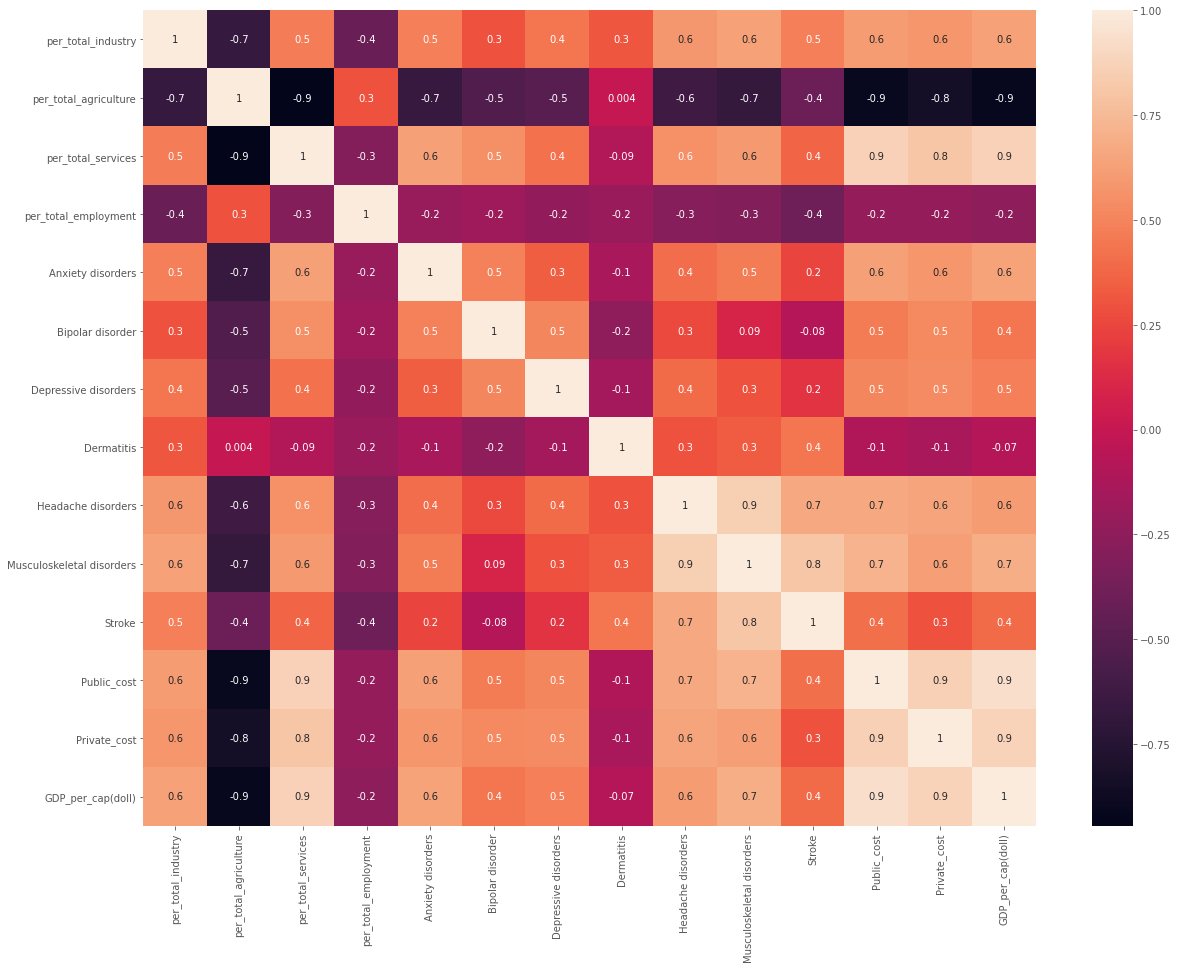

In [67]:
#check correlations:
df_corr = complete_2.corr(method = 'spearman')
figure = plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, fmt = '.1g') 
plt.show()
# 

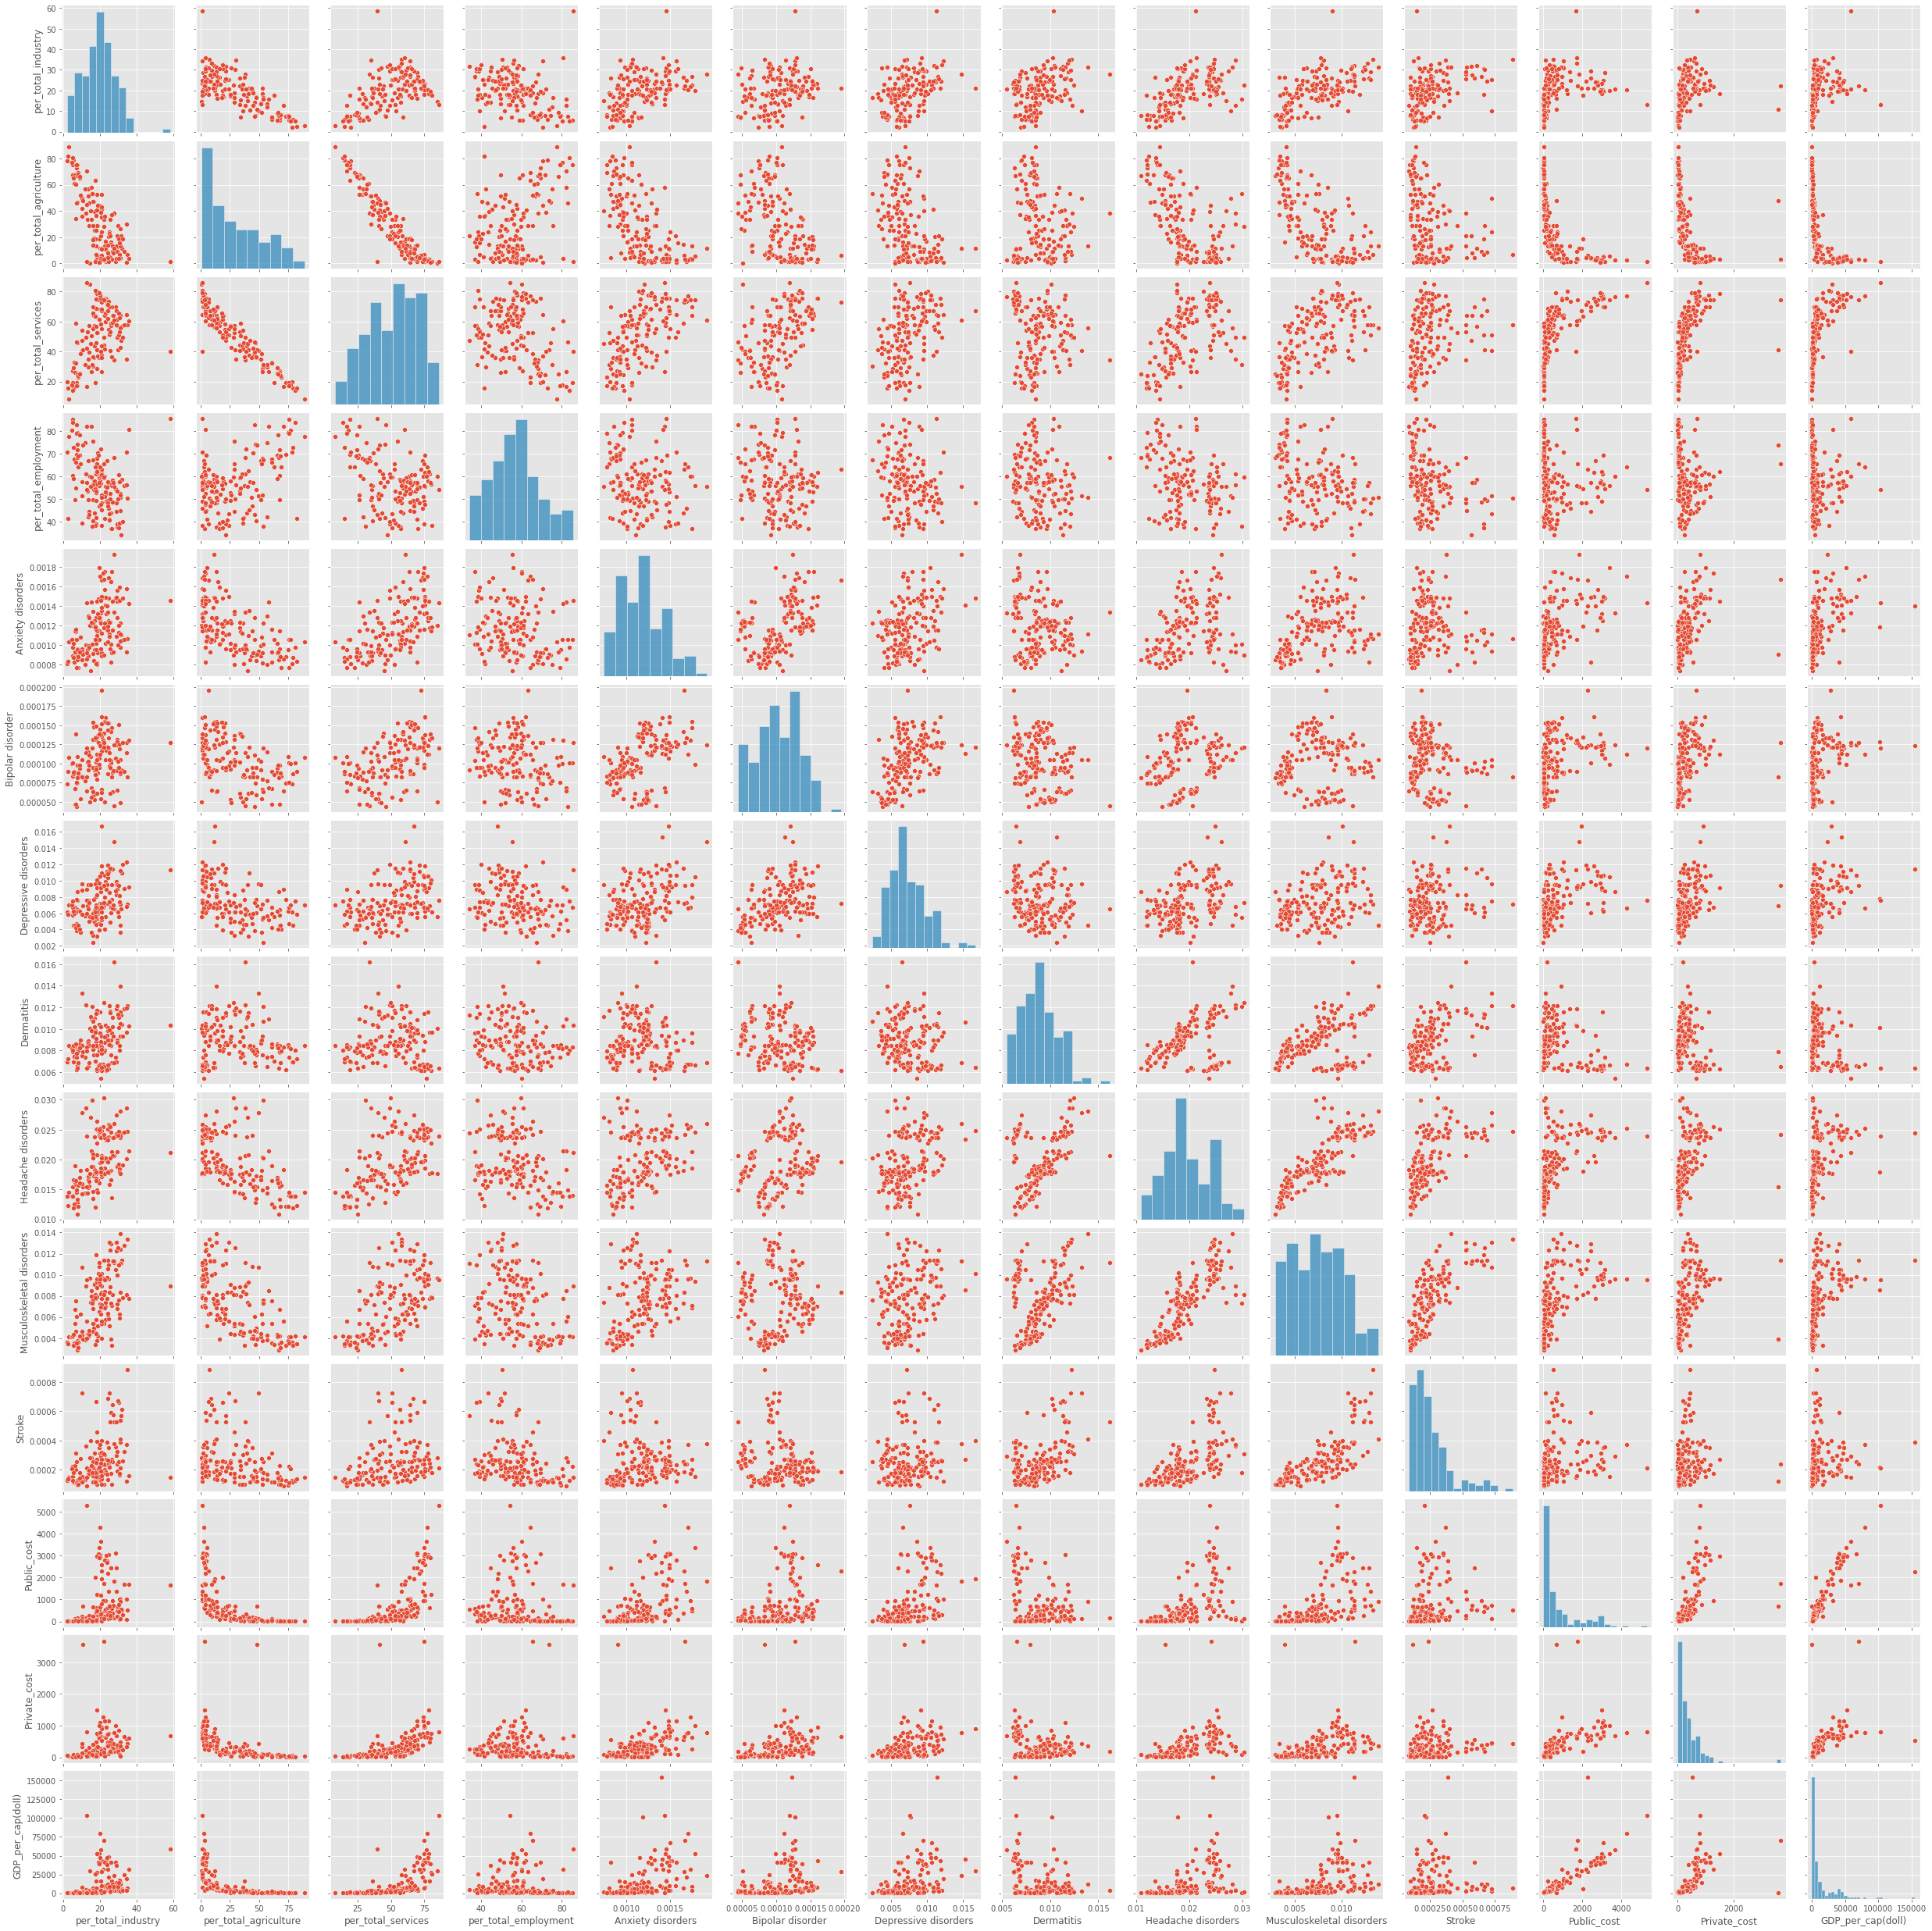

In [70]:
# Create column with total percentage of incidence for all diseases (it's % over whole population)
sns.pairplot(complete_2)
plt.show()